#**INF5103** - Concepts statistiques pour la science des données


#**PROJET DE SESSION** : Classification des scènes d'images
#**Moukaila SOSSAH - Oumarou Bako HOUSSENI - Lema Nadia KAJENEZA**


#Classifier Convolutional Neural Network - CNN - Intel Image Classification

#My Own Drive where Data are located

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
folder = "/content/drive/MyDrive/INF5103_Hiver2023/projet_session/"

In [12]:
!pwd

/content


In [13]:
!unzip "/content/drive/MyDrive/INF5103_Hiver2023/projet_session/archive.zip"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train

In [5]:
%matplotlib inline
import numpy as np
import os
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from google.colab import files
from google.colab import runtime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

#Data Exploration

In [14]:
!ls
train_dir = "seg_train/seg_train/"
test_dir = "seg_test/seg_test/"
pred_dir = "seg_pred/seg_pred/"
#Train dir of each class
train_dir_buildings = os.path.join(train_dir,"buildings")
train_dir_forest = os.path.join(train_dir,"forest")
train_dir_glacier = os.path.join(train_dir,"glacier")
train_dir_mountain = os.path.join(train_dir,"mountain")
train_dir_sea = os.path.join(train_dir,"sea")
train_dir_street = os.path.join(train_dir,"street")
#Test dir for each class
test_dir_buildings = os.path.join(test_dir,"buildings")
test_dir_forest = os.path.join(test_dir,"forest")
test_dir_glacier = os.path.join(test_dir,"glacier")
test_dir_mountain = os.path.join(test_dir,"mountain")
test_dir_sea = os.path.join(test_dir,"sea")
test_dir_street = os.path.join(test_dir,"street")

drive  sample_data  seg_pred  seg_test	seg_train


In [15]:
#Check the number of files on each class for train data
len(os.listdir(train_dir_buildings)),len(os.listdir(train_dir_forest)),len(os.listdir(train_dir_glacier)), len(os.listdir(train_dir_mountain)),len(os.listdir(train_dir_sea)),len(os.listdir(train_dir_street))

(2191, 2271, 2404, 2512, 2274, 2382)

In [16]:
len(os.listdir(pred_dir))

7301

In [17]:
#Check the number of files on each class for test data
len(os.listdir(test_dir_buildings)),len(os.listdir(test_dir_forest)),len(os.listdir(test_dir_glacier)),len(os.listdir(test_dir_mountain)),len(os.listdir(test_dir_sea)),len(os.listdir(test_dir_street))

(437, 474, 553, 525, 510, 501)

In [18]:
total_test_image = len(os.listdir(test_dir_buildings)) + len(os.listdir(test_dir_forest)) + len(os.listdir(test_dir_glacier)) + len(os.listdir(test_dir_mountain)) + len(os.listdir(test_dir_sea)) + len(os.listdir(test_dir_street))

In [19]:
index_img = 10
img_building = [ os.path.join(train_dir_buildings,filename) for filename in os.listdir(train_dir_buildings)]
img_forest = [ os.path.join(train_dir_forest,filename) for filename in os.listdir(train_dir_forest)]
img_mountain = [ os.path.join(train_dir_mountain,filename) for filename in os.listdir(train_dir_mountain)]
img_sea = [ os.path.join(train_dir_sea,filename) for filename in os.listdir(train_dir_sea) ]
img_glacier = [ os.path.join(train_dir_glacier,filename) for filename in os.listdir(train_dir_glacier)]
img_street = [ os.path.join(train_dir_street,filename) for filename in os.listdir(train_dir_street)]
print(img_building)

['seg_train/seg_train/buildings/10191.jpg', 'seg_train/seg_train/buildings/15701.jpg', 'seg_train/seg_train/buildings/8261.jpg', 'seg_train/seg_train/buildings/7478.jpg', 'seg_train/seg_train/buildings/14918.jpg', 'seg_train/seg_train/buildings/10303.jpg', 'seg_train/seg_train/buildings/263.jpg', 'seg_train/seg_train/buildings/1343.jpg', 'seg_train/seg_train/buildings/20027.jpg', 'seg_train/seg_train/buildings/13946.jpg', 'seg_train/seg_train/buildings/1231.jpg', 'seg_train/seg_train/buildings/18743.jpg', 'seg_train/seg_train/buildings/3339.jpg', 'seg_train/seg_train/buildings/19901.jpg', 'seg_train/seg_train/buildings/7584.jpg', 'seg_train/seg_train/buildings/6213.jpg', 'seg_train/seg_train/buildings/16939.jpg', 'seg_train/seg_train/buildings/16243.jpg', 'seg_train/seg_train/buildings/3207.jpg', 'seg_train/seg_train/buildings/1263.jpg', 'seg_train/seg_train/buildings/4082.jpg', 'seg_train/seg_train/buildings/2300.jpg', 'seg_train/seg_train/buildings/16614.jpg', 'seg_train/seg_train/bu

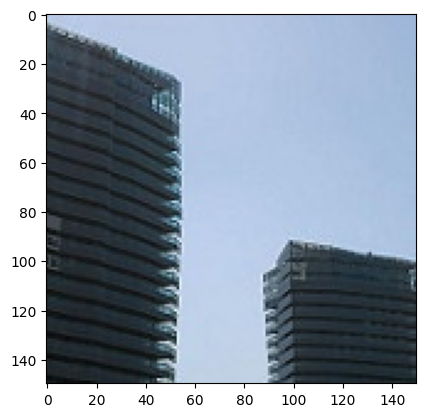

In [20]:
img_b = mpimg.imread(img_building[index_img])
img_f = mpimg.imread(img_forest[index_img])
plt.imshow(img_b)

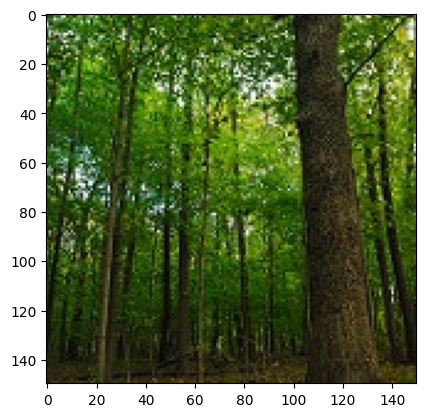

In [21]:
plt.imshow(img_f)

In [22]:
image_label_name = ["buildings","forest","glacier","mountain","sea","street"]
image_label_id = [0,1,2,3,4,5]

#Data Processing

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
train_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
             directory=train_dir, #Directory for train classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

#Test Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(
             directory=test_dir, #Directory for test classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#**1- First CNN Model**

In [16]:
model1 = tf.keras.models.Sequential([
    #5 round of convolution and MaxPooling
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Transform 2D to 1D with flatten for Dense layer
    tf.keras.layers.Flatten(),
    #Add 3 Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])

In [17]:
#Check the model and params
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

#Add Callbacks and define threshold

In [27]:
#best model filename and path
model_path = "best_model.h5"
#define callbacks
callback1 = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='accuracy', save_best_only=True)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
class moukCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.1):
      print("\nLoss in under 40 percent")
      self.model.stop_training=True

callback3 = moukCallback()

In [19]:
#Compile the model
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

#model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )

In [20]:
#Adjust the model
history = model1.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=(test_data))

Epoch 1/150
110/110 [==============================] - 31s 218ms/step - loss: 1.2333 - accuracy: 0.4865 - val_loss: 1.0161 - val_accuracy: 0.5953


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/150
110/110 [==============================] - 24s 217ms/step - loss: 0.9663 - accuracy: 0.6097 - val_loss: 0.9504 - val_accuracy: 0.6233
Epoch 3/150
110/110 [==============================] - 22s 202ms/step - loss: 0.8580 - accuracy: 0.6650 - val_loss: 0.8226 - val_accuracy: 0.6893
Epoch 4/150
110/110 [==============================] - 21s 193ms/step - loss: 0.7488 - accuracy: 0.7136 - val_loss: 0.7724 - val_accuracy: 0.7140
Epoch 5/150
110/110 [==============================] - 22s 195ms/step - loss: 0.6784 - accuracy: 0.7438 - val_loss: 0.6928 - val_accuracy: 0.7387
Epoch 6/150
110/110 [==============================] - 22s 199ms/step - loss: 0.6056 - accuracy: 0.7784 - val_loss: 0.6197 - val_accuracy: 0.7703
Epoch 7/150
110/110 [==============================] - 21s 193ms/step - loss: 0.5825 - accuracy: 0.7854 - val_loss: 0.5902 - val_accuracy: 0.7763
Epoch 8/150
110/110 [==============================] - 22s 202ms/step - loss: 0.5249 - accuracy: 0.8054 - val_loss: 0.5735 -

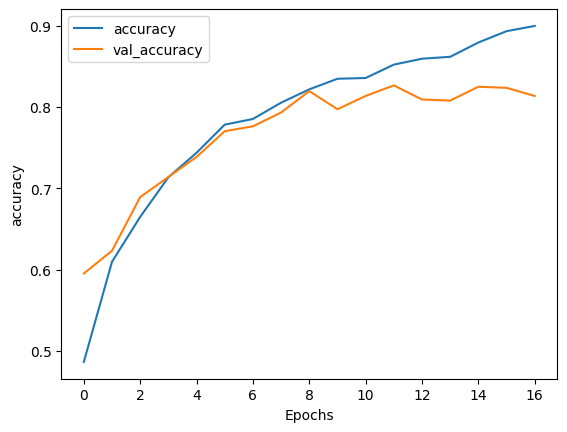

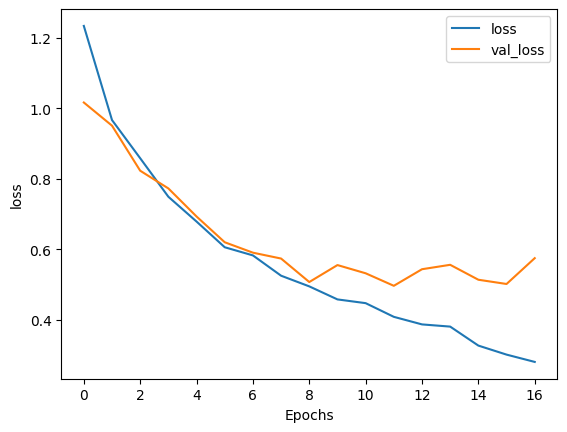

In [21]:
#Define Plot function
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 7s 274ms/step


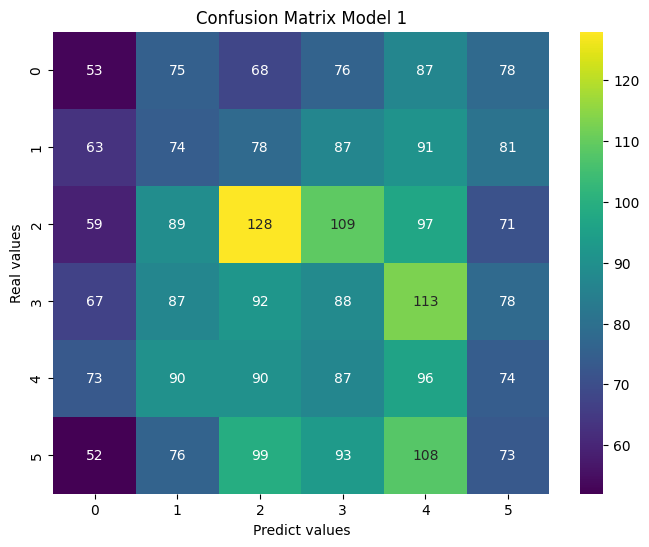

In [22]:
#Confution Matrix
Y_pred = model1.predict(test_data,total_test_image)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 1')
plt.show()

#**2- Image Compression Impact**

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
train_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
             directory=train_dir, #Directory for train classes images
             target_size=(100,100), #Resize all image to 100*100 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

#Test Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(
             directory=test_dir, #Directory for test classes images
             target_size=(100,100), #Resize all image to 100*100 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [24]:
model2 = tf.keras.models.Sequential([
    #3 round of convolution and MaxPooling
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu' padding='valid'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #Transform 2D to 1D with flatten for Dense layer
    tf.keras.layers.Flatten(),
    #Add 3 Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 64)       

In [26]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history= model2.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - 17s 128ms/step - loss: 1.0351 - accuracy: 0.5953 - val_loss: 0.7934 - val_accuracy: 0.6980
Epoch 2/150
110/110 [==============================] - 14s 125ms/step - loss: 0.7074 - accuracy: 0.7398 - val_loss: 0.6874 - val_accuracy: 0.7563
Epoch 3/150
110/110 [==============================] - 14s 128ms/step - loss: 0.5997 - accuracy: 0.7798 - val_loss: 0.6463 - val_accuracy: 0.7600
Epoch 4/150
110/110 [==============================] - 20s 178ms/step - loss: 0.4953 - accuracy: 0.8177 - val_loss: 0.5958 - val_accuracy: 0.7943
Epoch 5/150
110/110 [==============================] - 15s 133ms/step - loss: 0.4428 - accuracy: 0.8397 - val_loss: 0.5893 - val_accuracy: 0.7903
Epoch 6/150
110/110 [==============================] - 14s 126ms/step - loss: 0.3364 - accuracy: 0.8831 - val_loss: 0.5313 - val_accuracy: 0.8163
Epoch 7/150
110/110 [==============================] - 14s 132ms/step - loss: 0.2699 - accuracy: 0.9060 - val_loss: 0.5588 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 14s 130ms/step - loss: 0.2222 - accuracy: 0.9232 - val_loss: 0.5691 - val_accuracy: 0.8180
Epoch 9/150
110/110 [==============================] - 15s 135ms/step - loss: 0.1527 - accuracy: 0.9508 - val_loss: 0.6400 - val_accuracy: 0.8213
Epoch 10/150
110/110 [==============================] - 14s 130ms/step - loss: 0.1054 - accuracy: 0.9655 - val_loss: 0.7262 - val_accuracy: 0.8003
Epoch 11/150
110/110 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9768
Loss in under 40 percent
110/110 [==============================] - 15s 132ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.7266 - val_accuracy: 0.8093


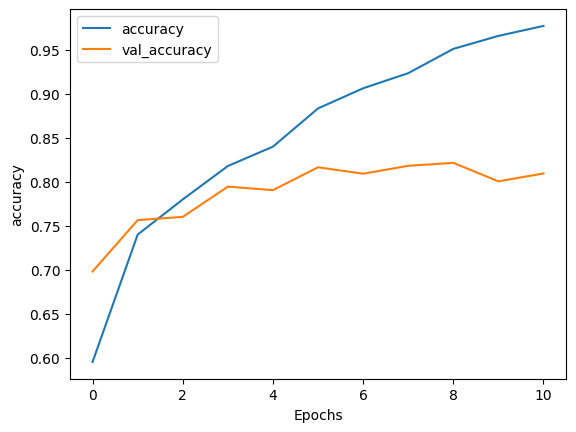

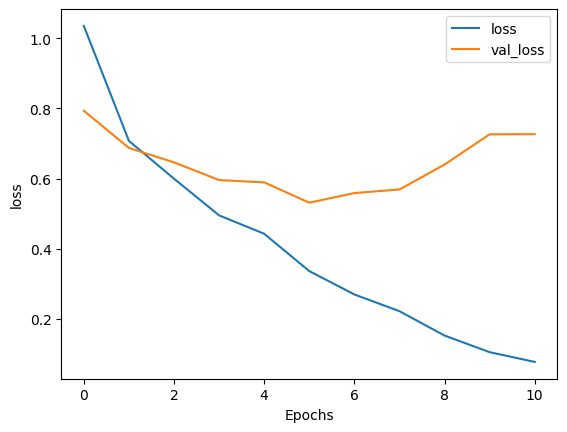

In [28]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 4s 154ms/step


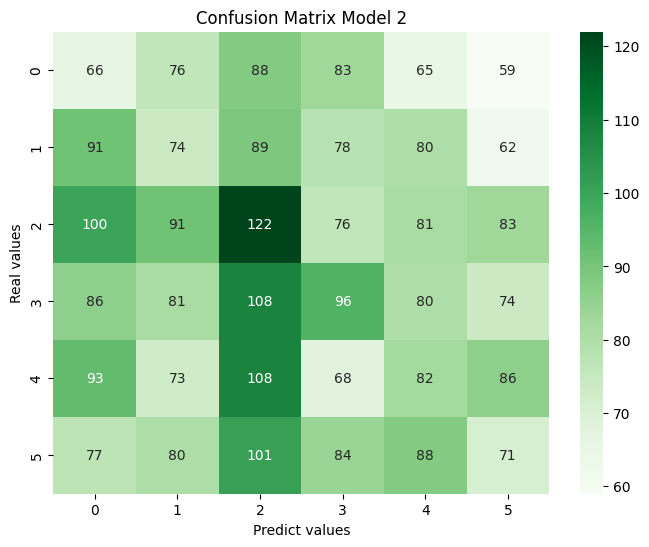

In [32]:
#Confution Matrix
Y_pred = model2.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 2')
plt.show()

#**3- Data Augmentation Impact**

In [33]:
# Use ImageDataGenerator API to perform Data augmentation on train data in order to train much data
train_data_generator = ImageDataGenerator(rescale=1/255,
                                          rotation_range=40,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          shear_range=0.2
                                          )

train_data = train_data_generator.flow_from_directory(directory=train_dir,
                                                                target_size=(150,150),
                                                                class_mode="categorical",
                                                                batch_size=128
                                                              )

test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [34]:
model3 = tf.keras.models.Sequential([
        #Convolution layer 5 round
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Convert 2D to 1D for Dense layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')

])

In [35]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 64)       

In [36]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history= model3.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - 102s 893ms/step - loss: 1.3844 - accuracy: 0.4192 - val_loss: 1.2117 - val_accuracy: 0.4907
Epoch 2/150
110/110 [==============================] - 89s 814ms/step - loss: 1.1511 - accuracy: 0.5381 - val_loss: 1.0368 - val_accuracy: 0.6060
Epoch 3/150
110/110 [==============================] - 90s 815ms/step - loss: 1.0291 - accuracy: 0.5935 - val_loss: 0.9289 - val_accuracy: 0.6620
Epoch 4/150
110/110 [==============================] - 89s 811ms/step - loss: 0.9631 - accuracy: 0.6314 - val_loss: 0.9928 - val_accuracy: 0.6110
Epoch 5/150
110/110 [==============================] - 90s 821ms/step - loss: 0.9027 - accuracy: 0.6600 - val_loss: 0.8028 - val_accuracy: 0.7027
Epoch 6/150
110/110 [==============================] - 89s 813ms/step - loss: 0.8618 - accuracy: 0.6761 - val_loss: 0.7429 - val_accuracy: 0.7250
Epoch 7/150
110/110 [==============================] - 88s 799ms/step - loss: 0.8361 - accuracy: 0.6914 - val_loss: 0.7050 

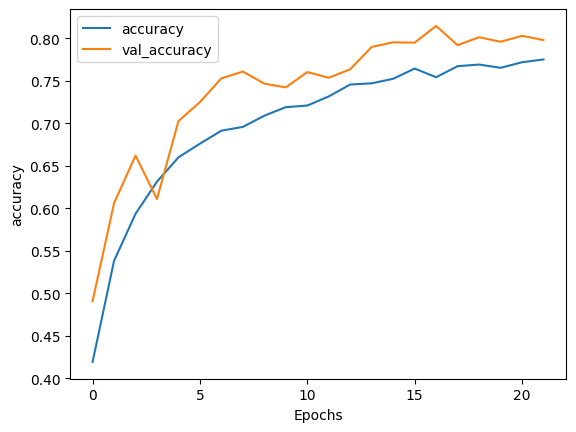

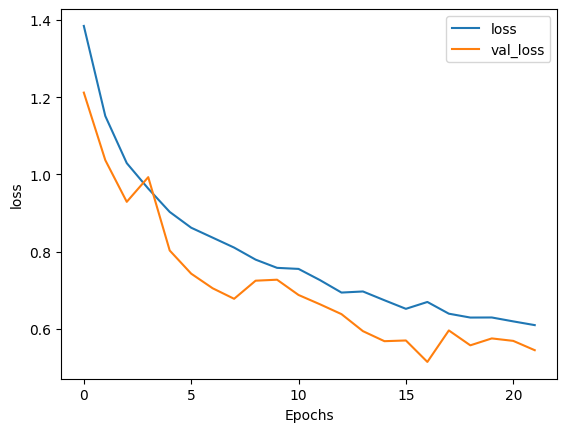

In [38]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 4s 170ms/step


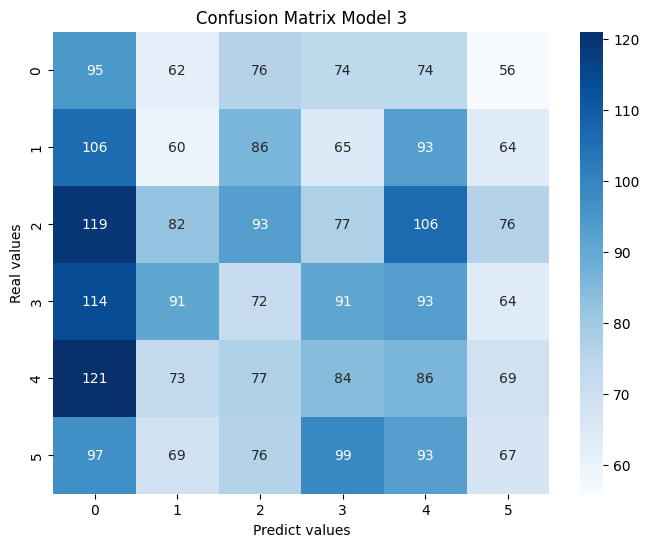

In [39]:
#Confution Matrix
Y_pred = model3.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 3')
plt.show()

#**4- Transfer Learning**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-03-31 16:55:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   116MB/s    in 0.7s    

2024-03-31 16:55:36 (116 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_inceptionv3_file = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pretrained_model = InceptionV3(input_shape=(150,150,3),
                               include_top = False,
                               weights = None)

pretrained_model.load_weights(weights_inceptionv3_file)

for layer in pretrained_model.layers:
  layer.trainable = False

last_layer = pretrained_model.get_layer("mixed10")

output_layer = last_layer.output

#pretrained_model = vgg16.VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)



In [3]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [23]:
#Create the model and use output_layer as input
x = tf.keras.layers.Flatten()(output_layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

model4 = tf.keras.Model(pretrained_model.input, x)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
train_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
             directory=train_dir, #Directory for train classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

#Test Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(
             directory=test_dir, #Directory for test classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history = model4.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.8699

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 756s 7s/step - loss: 0.5194 - accuracy: 0.8699 - val_loss: 0.6093 - val_accuracy: 0.8217
Epoch 2/150
 10/110 [=>............................] - ETA: 9:06 - loss: 0.4860 - accuracy: 0.8633

In [ ]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Confution Matrix
Y_pred = model4.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 4')
plt.show()

#Perform Prediction with the best Model

In [ ]:
files_uploaded = files.upload()
main_folder = "/content/"
best_model = model1
#best_model = model2
#best_model = model3
#best_model = model4

#file prediction with best model
for f in files_uploaded.keys():
  path_file = main_folder + f
  image = load_img(path_file, target_size=(150,150))
  x = img_to_array(image)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack()
  img_resize = cv2.resize(img, (224,224))
  img_resize = np.expand_dims(img_resize, axis=0)
  prediction = best_model.predict(images, )
  max_id = np.argmax(prediction)
  print(f'The image is classified as : ' + image_label_name[max_id])

In [ ]:
#Free up the memory
runtime.unassign()